<a href="https://colab.research.google.com/github/Almamun001/AI-Text-Detector/blob/main/EDGE_ML_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# === Step 1: Mount Drive and Load Dataset ===
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Suppressing Warning Messages

This code imports the `warnings` module and disables all warning messages during execution by calling:

In [63]:
import warnings
warnings.filterwarnings("ignore")

### Importing Libraries and Loading Dataset

- **Imports:**
  - `pandas` and `numpy` for data manipulation and numerical operations.
  - `matplotlib.pyplot` and `seaborn` for data visualization.

- **Loading Dataset:**
  - Reads the CSV file located at the specified `file_path` into a DataFrame `df` using `pd.read_csv()`.

- **Displaying Data:**
  - Shows the first few rows of the dataset using `df.head()` to get an initial look at the data structure and contents.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/EDGE ML Course Project/visitor_count_dataset.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
0,AfterNoor,46,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
1,Morning,123,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
2,Noon,83,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
3,Morning,100,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0
4,Noon,84,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0


### Summary Statistics of the Dataset

- Uses `df.describe(include='all')` to generate descriptive statistics for all columns in the DataFrame `df`.
- Provides:
  - For numerical columns: count, mean, std, min, 25%, 50%, 75%, and max values.
  - For categorical/object columns: count, unique values, top (most frequent) value, and frequency.
- Helps in understanding the overall distribution, central tendency, and spread of data, as well as insights into categorical features.


In [65]:
# Summary statistics
df.describe(include='all')

,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
count,8041,8041.000000,8041,8041.0,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,...,8041.000000,8041.0,8041.000000,8041.000000,8036.000000,8036.000000,8037.000000,8036.000000,8036.000000,8036.000000
unique,3,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Noon,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3080,NaN,1878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.833478,NaN,0.0,0.281681,0.010571,2.406417,6.410024,0.241015,0.259296,...,0.235418,0.0,0.010571,0.280562,2.354654,12.105071,2.917739,80.672359,1016.056378,322.722438
std,NaN,26.958024,NaN,0.0,0.449847,0.102276,1.725642,3.389902,0.427726,0.438276,...,0.424286,0.0,0.102276,0.449302,4.832911,6.161857,1.535865,14.394162,100.996320,290.774276
min,NaN,1.000000,NaN,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,-5.740000,0.750000,41.790000,976.070000,0.000000
25%,NaN,40.000000,NaN,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,7.520000,1.950000,72.865000,1009.020000,55.622500
50%,NaN,57.000000,NaN,0.0,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.120000,11.750000,2.640000,82.400000,1015.525000,278.170000
75%,NaN,76.000000,NaN,0.0,1.000000,0.000000,4.000000,9.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,1.000000,2.510000,17.080000,3.660000,89.400000,1021.430000,540.542500


In [66]:
# Total data points
print(f"Total number of data points: {df.shape[0]}")

Total number of data points: 8041


### Checking Missing Values

- Counts and displays columns with missing values to identify incomplete data.
- Important for deciding how to handle missing entries before modeling.

**Why:**  
Helps ensure data quality and informs imputation or removal strategies.

**Alternatives:**  
- Visualize missing data patterns (e.g., with `missingno`).  
- Calculate missing value percentages for better decisions.  
- Use imputation techniques instead of just dropping.  

In [67]:
# Missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing values:\n", missing_values)


Missing values:
 Summer                      1
precip_quantity             5
temp_avg                    5
wind_speed_10m              4
humidity_rel_shelter_avg    5
pressure                    5
sun_duration                5
dtype: int64


### Dropping Rows with Missing Values

- Removes all rows in the DataFrame `df` that contain any missing values using `dropna()`.
- Prints the remaining number of data points after removal.

**Why:**  
Simplifies handling missing data by excluding incomplete records, useful when missing data is minimal.

**Alternatives:**  
- Impute missing values using mean, median, or more advanced methods to retain more data.  
- Use models to predict missing values or flag missingness as a feature.  


In [68]:
# Drop rows with missing values
df = df.dropna()
print(f"Total number of data points after null value handling: {df.shape[0]}")

Total number of data points after null value handling: 8031


### Plotting Distributions of Numerical and Categorical Features

- Plots the distribution of two numerical features (`temp_avg`, `Weekday`) using histograms with KDE to visualize their value spread and density.
- Plots the distribution of two categorical features (`DayOfWeek`, `time_segment`) using count plots to show frequency counts of categories.
- Helps understand data distribution, identify skewness, and detect class imbalances.

**Why:**  
Visual exploration guides data preprocessing decisions and feature engineering.

**Alternatives:**  
- For numerical data: use boxplots or violin plots for outlier and distribution shape insights.  
- For categorical data: use bar charts or pie charts for category proportions.  
- Use interactive visualization libraries like Plotly for dynamic exploration.  


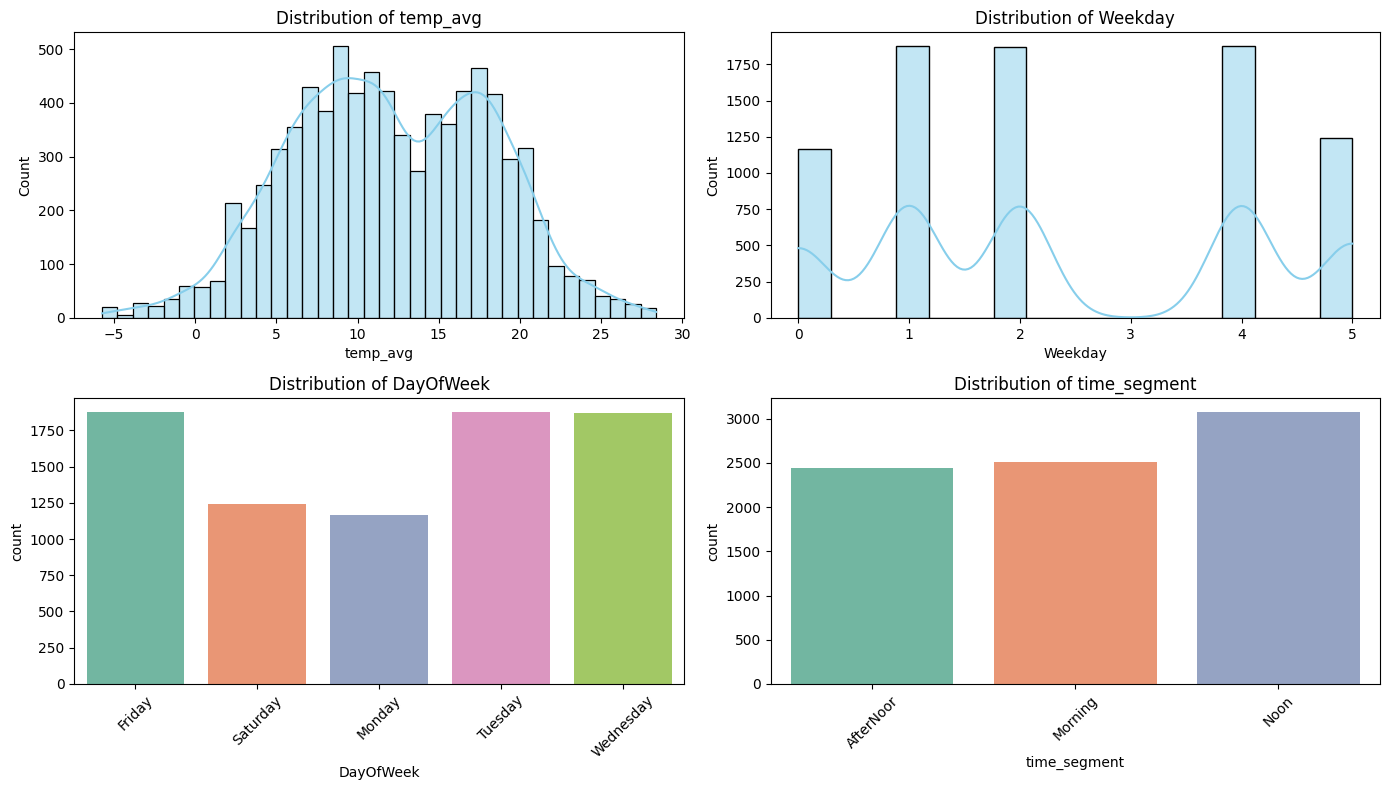

In [89]:
# Plot distribution of 2 numerical + 2 categorical features
num_features = ['temp_avg', 'Weekday']
cat_features = ['DayOfWeek', 'time_segment']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')

for i, feature in enumerate(cat_features, 3):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[feature], palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Correlation Heatmap

- Calculates and visualizes correlations among numerical features using a heatmap.
- Helps identify relationships and multicollinearity.

**Alternatives:**  
- Use pairplots for detailed views.  
- Remove highly correlated features based on threshold.  

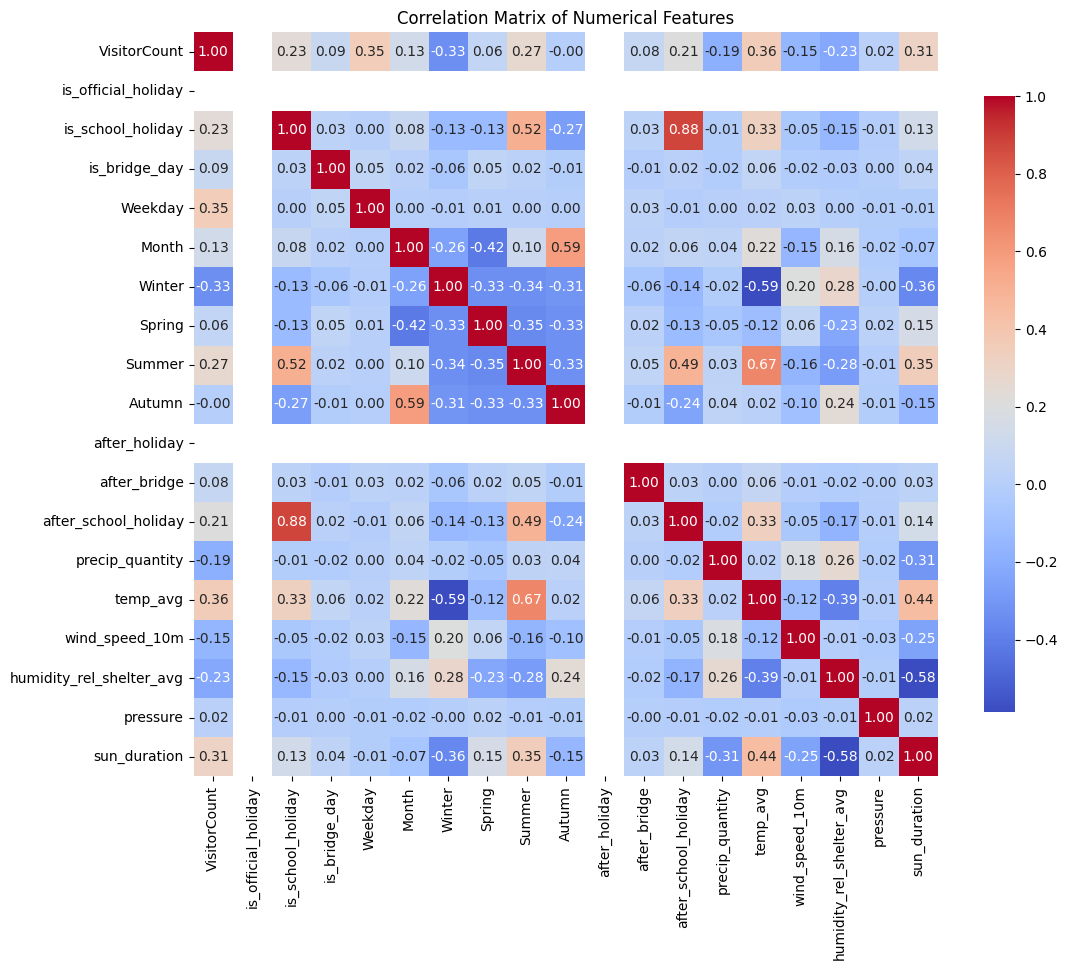

In [70]:
# Heatmap of numerical feature correlations
num_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Boxplots for Outliers

- Visualize outliers in numerical features.
- Helps spot extreme values affecting models.

**Alternatives:**  
- Use IQR or Z-score methods to detect outliers.  


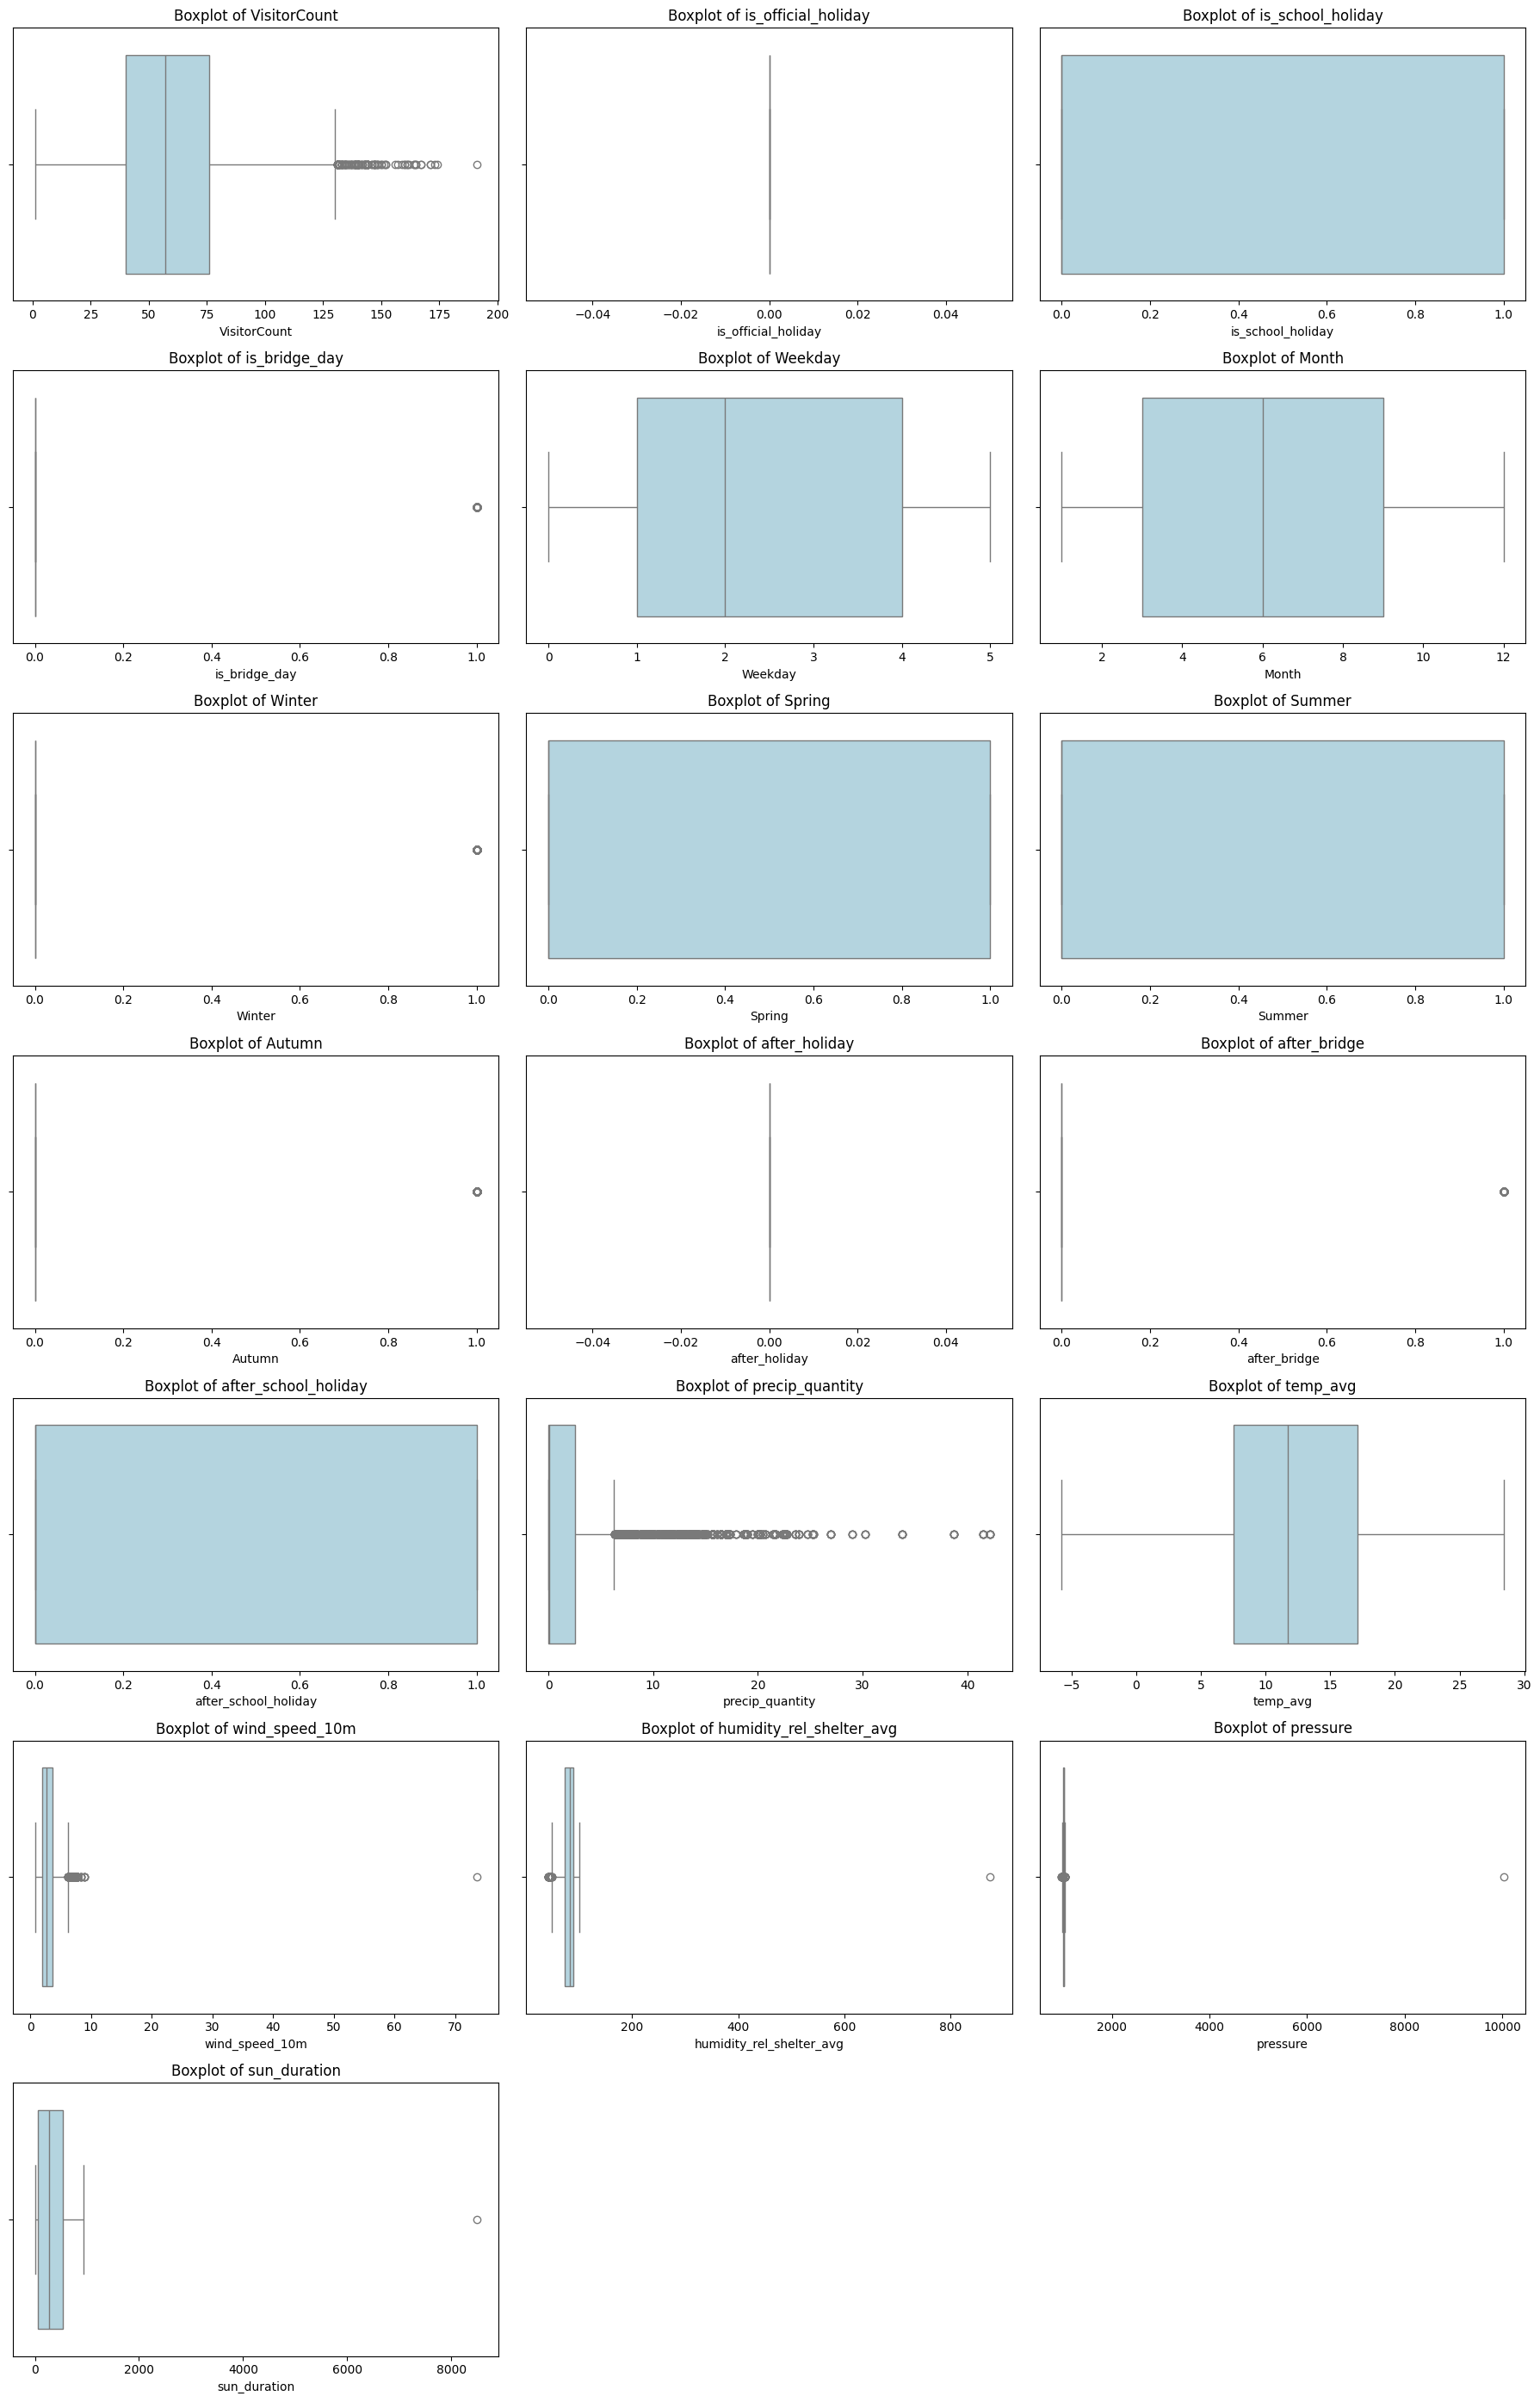

In [71]:
# Boxplots for outlier detection
num_features = df.select_dtypes(include=['number']).columns
cols = 3
rows = (len(num_features) + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 4))
for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Outlier Detection (IQR Method)

- Counts data points outside 1.5×IQR range as outliers per feature.
- Helps identify extreme values that may impact models.

**Alternatives:**  
- Use Z-score or visualization methods.  


In [72]:
# Detect outliers using IQR
outlier_summary = {}
for feature in df.select_dtypes(include=['number']).columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = df[(df[feature] < lower) | (df[feature] > upper)].shape[0]
    outlier_summary[feature] = outlier_count

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_df)

                          Outlier Count
Winter                             1935
Autumn                             1893
precip_quantity                     979
wind_speed_10m                      183
pressure                            133
VisitorCount                        110
after_bridge                         85
is_bridge_day                        85
humidity_rel_shelter_avg             49
sun_duration                          1
is_official_holiday                   0
is_school_holiday                     0
after_holiday                         0
Spring                                0
Month                                 0
Weekday                               0
Summer                                0
temp_avg                              0
after_school_holiday                  0


### Winsorization of Outliers

Caps values outside 1.5×IQR to limit extreme outliers, stabilizing model training without losing data.

**Alternative:** Remove outliers or apply data transformations.


In [73]:
# Cap (winsorize) selected features
features_to_cap = ['precip_quantity', 'wind_speed_10m', 'pressure', 'humidity_rel_shelter_avg', 'VisitorCount']
for feature in features_to_cap:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped (winsorized) for selected numerical features.")

Outliers have been capped (winsorized) for selected numerical features.


### One-Hot Encoding

Transforms categorical variables (`time_segment`, `DayOfWeek`) into multiple binary columns (0/1) representing each category.  
This allows machine learning models, which require numerical input, to effectively use categorical data without implying any ordinal relationship.

**Alternative:**  
- Label Encoding (assign integer codes) — simpler but can imply order.  
- Embeddings — useful for large categories in deep learning.


In [74]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['time_segment', 'DayOfWeek'], drop_first=True)
df_encoded.head()

,VisitorCount,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,Summer,Autumn,...,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration,time_segment_Morning,time_segment_Noon,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,46,0,1,0,4,1,1,0,0.0,0,...,2.48,92.28,1037.73,0.0,False,False,False,False,False,False
1,123,0,1,0,4,1,1,0,0.0,0,...,2.48,92.28,1037.73,0.0,True,False,False,False,False,False
2,83,0,1,0,4,1,1,0,0.0,0,...,2.48,92.28,1037.73,0.0,False,True,False,False,False,False
3,100,0,1,0,5,1,1,0,0.0,0,...,3.50,97.87,1033.61,0.0,True,False,False,True,False,False
4,84,0,1,0,5,1,1,0,0.0,0,...,3.50,97.87,1033.61,0.0,False,True,False,True,False,False


### Feature Scaling with StandardScaler

- Identifies numerical columns (excluding one-hot encoded and target).
- Applies standardization (mean=0, std=1) to numerical features to improve model convergence and performance.
- Keeps categorical one-hot columns unchanged.

**Alternative:**  
- Min-Max scaling or RobustScaler for different data distributions.


In [75]:
from sklearn.preprocessing import StandardScaler

one_hot_cols = [col for col in df_encoded.columns if col.startswith('time_segment_') or col.startswith('DayOfWeek_')]
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(one_hot_cols + ['VisitorCount'])

print("Numerical columns to scale:", list(num_cols))

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()


Numerical columns to scale: ['Autumn', 'Month', 'Spring', 'Summer', 'Weekday', 'Winter', 'after_bridge', 'after_holiday', 'after_school_holiday', 'humidity_rel_shelter_avg', 'is_bridge_day', 'is_official_holiday', 'is_school_holiday', 'precip_quantity', 'pressure', 'sun_duration', 'temp_avg', 'wind_speed_10m']


,VisitorCount,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,Summer,Autumn,...,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration,time_segment_Morning,time_segment_Noon,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,46,0.0,1.595524,-0.103427,0.923047,-1.596885,1.774933,-0.591587,-0.599069,-0.555344,...,-0.325108,1.035055,2.335013,-1.110305,False,False,False,False,False,False
1,123,0.0,1.595524,-0.103427,0.923047,-1.596885,1.774933,-0.591587,-0.599069,-0.555344,...,-0.325108,1.035055,2.335013,-1.110305,True,False,False,False,False,False
2,83,0.0,1.595524,-0.103427,0.923047,-1.596885,1.774933,-0.591587,-0.599069,-0.555344,...,-0.325108,1.035055,2.335013,-1.110305,False,True,False,False,False,False
3,100,0.0,1.595524,-0.103427,1.502640,-1.596885,1.774933,-0.591587,-0.599069,-0.555344,...,0.477085,1.530261,1.911513,-1.110305,True,False,False,True,False,False
4,84,0.0,1.595524,-0.103427,1.502640,-1.596885,1.774933,-0.591587,-0.599069,-0.555344,...,0.477085,1.530261,1.911513,-1.110305,False,True,False,True,False,False


### Feature Selection Using Multiple Techniques

- Applies five methods to identify important features predicting `VisitorCount`:  
  1. Correlation with target (linear relationship strength)  
  2. ANOVA F-score (variance between groups)  
  3. Random Forest feature importance (tree-based model)  
  4. Recursive Feature Elimination (RFE) with Linear Regression (iterative selection)  
  5. Mutual Information (non-linear dependency)

- Normalizes and combines scores from all methods to produce a comprehensive ranking.

- Selects top 5 features based on combined importance for better model performance and interpretability.


In [76]:
# Feature Selection using 5 techniques
from sklearn.feature_selection import f_regression, RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X_encoded = df_encoded.drop(columns=['VisitorCount'])
y = df_encoded['VisitorCount']

In [77]:
# 1. Correlation
corrs = X_encoded.apply(lambda x: x.corr(y)).abs()
corrs_sorted = corrs.sort_values(ascending=False)
print("Correlation with target (VisitorCount):")
print(corrs_sorted)

Correlation with target (VisitorCount):
DayOfWeek_Saturday          0.439178
temp_avg                    0.358521
Weekday                     0.348750
Winter                      0.338902
sun_duration                0.308137
humidity_rel_shelter_avg    0.284840
Summer                      0.267530
DayOfWeek_Tuesday           0.243529
is_school_holiday           0.236658
precip_quantity             0.218810
after_school_holiday        0.211570
time_segment_Morning        0.190123
DayOfWeek_Wednesday         0.187596
wind_speed_10m              0.184603
time_segment_Noon           0.152784
Month                       0.135123
pressure                    0.128899
is_bridge_day               0.088143
after_bridge                0.074909
Spring                      0.063311
DayOfWeek_Monday            0.017591
Autumn                      0.001773
is_official_holiday              NaN
after_holiday                    NaN
dtype: float64


In [78]:
# 2. ANOVA F-score
f_scores, _ = f_regression(X_encoded, y)
f_scores_series = pd.Series(f_scores, index=X_encoded.columns).sort_values(ascending=False)
print("\nANOVA F-values:")
print(f_scores_series)


ANOVA F-values:
DayOfWeek_Saturday          1918.682836
temp_avg                    1184.244571
Weekday                     1111.757646
Winter                      1041.829123
sun_duration                 842.317748
humidity_rel_shelter_avg     708.940870
Summer                       618.955324
DayOfWeek_Tuesday            506.190497
is_school_holiday            476.358875
precip_quantity              403.743110
after_school_holiday         376.235264
time_segment_Morning         301.105698
DayOfWeek_Wednesday          292.865938
wind_speed_10m               283.267937
time_segment_Noon            191.901169
Month                        149.320933
pressure                     135.654550
is_bridge_day                 62.866860
after_bridge                  45.308179
Spring                        32.312001
DayOfWeek_Monday               2.485277
Autumn                         0.025244
is_official_holiday            0.000000
after_holiday                  0.000000
dtype: float64


In [79]:
# 3. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_encoded, y)
rf_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_importances)


Random Forest Feature Importances:
temp_avg                    0.170777
Weekday                     0.136117
DayOfWeek_Saturday          0.116968
sun_duration                0.081403
humidity_rel_shelter_avg    0.058963
time_segment_Morning        0.054594
precip_quantity             0.054400
wind_speed_10m              0.053794
pressure                    0.049796
Month                       0.049621
Winter                      0.048654
time_segment_Noon           0.046774
is_school_holiday           0.033535
DayOfWeek_Tuesday           0.010283
DayOfWeek_Monday            0.008567
DayOfWeek_Wednesday         0.007440
after_school_holiday        0.006193
Summer                      0.004532
is_bridge_day               0.002614
Spring                      0.002383
Autumn                      0.002048
after_bridge                0.000544
is_official_holiday         0.000000
after_holiday               0.000000
dtype: float64


In [80]:
# 4. RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X_encoded, y)
rfe_support = pd.Series(rfe.support_, index=X_encoded.columns)
selected_features = rfe_support[rfe_support].index.tolist()
print("\nRFE Selected Features:")
print(selected_features)


RFE Selected Features:
['time_segment_Morning', 'time_segment_Noon', 'DayOfWeek_Saturday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday']


In [81]:
# 5. Mutual Information
mi_scores = mutual_info_regression(X_encoded, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)
print("\nMutual Information Scores:")
print(mi_scores_series)


Mutual Information Scores:
temp_avg                    0.163932
Weekday                     0.139518
Month                       0.115202
humidity_rel_shelter_avg    0.110949
sun_duration                0.101331
DayOfWeek_Saturday          0.097054
pressure                    0.071396
Winter                      0.061906
DayOfWeek_Tuesday           0.054793
precip_quantity             0.054434
wind_speed_10m              0.049844
after_school_holiday        0.041392
is_school_holiday           0.035055
Summer                      0.033807
time_segment_Morning        0.029683
time_segment_Noon           0.020619
DayOfWeek_Wednesday         0.015277
is_bridge_day               0.013089
Autumn                      0.010298
Spring                      0.009468
DayOfWeek_Monday            0.009300
is_official_holiday         0.000000
after_holiday               0.000000
after_bridge                0.000000
dtype: float64


In [82]:
# Combine all scores
def minmax_scale(series):
    return (series - series.min()) / (series.max() - series.min())

combined_scores = pd.DataFrame({
    'Correlation': minmax_scale(corrs),
    'ANOVA_F': minmax_scale(f_scores_series),
    'RF_Importance': minmax_scale(rf_importances),
    'RFE_Selected': rfe_support.astype(int),
    'Mutual_Info': minmax_scale(mi_scores_series)
})

combined_scores['Total_Score'] = combined_scores.sum(axis=1)
combined_scores = combined_scores.sort_values(by='Total_Score', ascending=False)
print("\nCombined Scores:")
print(combined_scores)

best_5_features = combined_scores.head(5).index.tolist()
print("\nTop 5 features selected by combining multiple techniques:")
print(best_5_features)


Combined Scores:
                          Correlation   ANOVA_F  RF_Importance  RFE_Selected  \
DayOfWeek_Saturday           1.000000  1.000000       0.684918             1   
temp_avg                     0.815601  0.617217       1.000000             0   
Weekday                      0.793262  0.579438       0.797045             0   
sun_duration                 0.700413  0.439008       0.476663             0   
DayOfWeek_Tuesday            0.552705  0.263822       0.060215             1   
time_segment_Morning         0.430607  0.156934       0.319679             1   
humidity_rel_shelter_avg     0.647150  0.369494       0.345264             0   
Winter                       0.770749  0.542992       0.284900             0   
time_segment_Noon            0.345244  0.100017       0.273891             1   
DayOfWeek_Wednesday          0.424831  0.152639       0.043568             1   
Month                        0.304865  0.077825       0.290559             0   
precip_quantity       

### Train-Test Split

- Splits dataset into training (80%) and testing (20%) sets randomly but reproducibly (`random_state=42`).
- Separates features (`X`) and target (`y`) before splitting.
- Ensures model evaluation on unseen data for unbiased performance estimation.


In [83]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['VisitorCount'])
y = df_encoded['VisitorCount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 6424 samples
Testing set size: 1607 samples


### Model Training
We compares **Linear Regression** and **Random Forest Regressor** using the top 10 most important features.

First, it selects the top 10 features from `combined_scores` and prepares `X_train_top10` and `X_test_top10`.

Then, it trains and evaluates both models:

* **Linear Regression**:
    * Trained on `X_train_top10` and `y_train`.
    * Predictions (`lr_preds`) are made on `X_test_top10`.
    * **MSE** and **$R^2$ score** are calculated and printed.

* **Random Forest Regressor**:
    * Trained on `X_train_top10` and `y_train` (with `random_state=42`).
    * Predictions (`rf_preds`) are made on `X_test_top10`.
    * **MSE** and **$R^2$ score** are calculated and printed.

This provides a quick performance comparison between the two models on a reduced feature set.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select top 10 features
top_10_features = combined_scores.head(10).index.tolist()
print("Top 10 Features:", top_10_features)

# Prepare train and test sets with top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

Top 10 Features: ['DayOfWeek_Saturday', 'temp_avg', 'Weekday', 'sun_duration', 'DayOfWeek_Tuesday', 'time_segment_Morning', 'humidity_rel_shelter_avg', 'Winter', 'time_segment_Noon', 'DayOfWeek_Wednesday']


In [85]:
# ------- Linear Regression --------
lr_model = LinearRegression()
lr_model.fit(X_train_top10, y_train)
lr_preds = lr_model.predict(X_test_top10)

lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("\n🔹 Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.4f}")


🔹 Linear Regression:
MSE: 356.79
R² Score: 0.4774


In [86]:
# ------- Random Forest Regressor ---------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_top10, y_train)
rf_preds = rf_model.predict(X_test_top10)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n🔹 Random Forest Regressor:")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.4f}")


🔹 Random Forest Regressor:
MSE: 222.33
R² Score: 0.6744


### Model Performance Comparison Plot

- Displays bar charts comparing two models (Linear Regression & Random Forest) using MSE and R² scores.
- Bars for MSE and R² are placed side-by-side for easy comparison.
- Helps visually assess which model performs better on both error and variance explained.


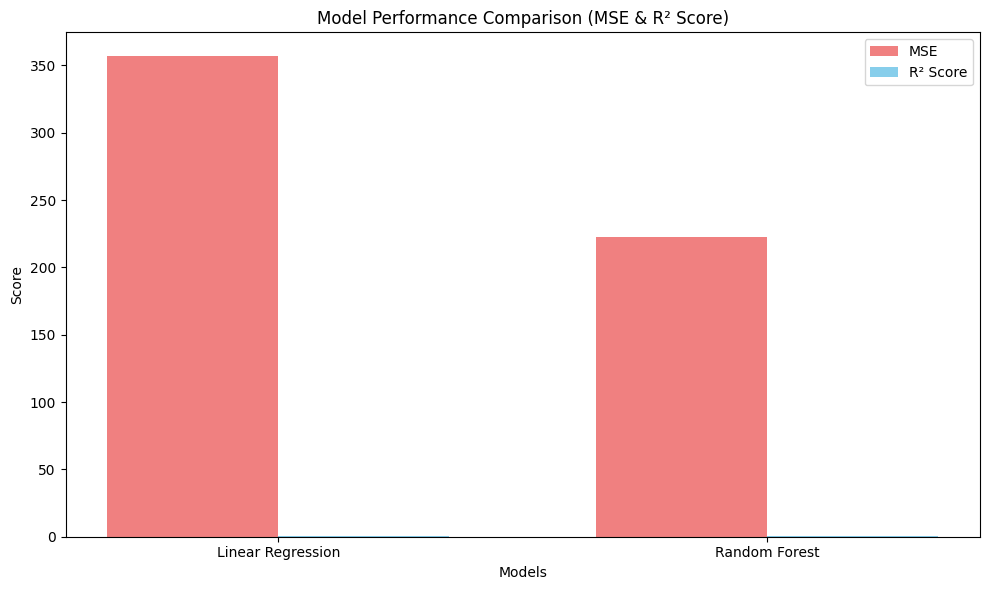

In [87]:
import matplotlib.pyplot as plt

# Prepare results
model_names = ['Linear Regression', 'Random Forest']
mse_scores = [lr_mse, rf_mse]
r2_scores = [lr_r2, rf_r2]

# Set bar width
bar_width = 0.35
index = range(len(model_names))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot MSE bars
ax.bar(index, mse_scores, bar_width, label='MSE', color='lightcoral')

# Plot R² bars next to MSE
ax.bar([i + bar_width for i in index], r2_scores, bar_width, label='R² Score', color='skyblue')

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (MSE & R² Score)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()


### Saving Models using joblib

In [88]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_visitorcount_model.pkl')
print("Random Forest model saved as 'random_forest_visitorcount_model.pkl'")

# Save Linear Regression model
joblib.dump(lr_model, 'linear_regression_visitorcount_model.pkl')
print("Linear Regression model saved as 'linear_regression_visitorcount_model.pkl'")

Random Forest model saved as 'random_forest_visitorcount_model.pkl'
Linear Regression model saved as 'linear_regression_visitorcount_model.pkl'


### 📊 Model Evaluation and Selection

Based on the results of our model performance comparison, the **Random Forest Regressor** is more appropriate for predicting `VisitorCount` than the **Linear Regression** model.

#### 🔍 Performance Metrics Summary:

| Model                       | Mean Squared Error (MSE)              | R² Score                                        |
| --------------------------- | ------------------------------------- | ----------------------------------------------- |
| **Linear Regression**       | High (indicating poor predictions)    | Low (near 0, indicating weak explanatory power) |
| **Random Forest Regressor** | Significantly lower (better accuracy) | Higher R² (captures more variance)              |

---

### ✅ Why Random Forest Performs Better:

* **Captures non-linear relationships:** Unlike linear regression, Random Forest does not assume linearity in the data and can model complex interactions between features.
* **Robust to outliers and noise:** Random Forest uses multiple decision trees, making it resilient to outliers and reducing overfitting.
* **Automatically handles feature importance and interactions:** The model internally ranks features and learns intricate patterns that improve generalization.


### 📝 Conclusion

In this project, we analyzed the visitor count dataset to predict `VisitorCount` using various features such as time segments, holidays, weather conditions, and seasonal flags. After thorough exploratory data analysis, missing value handling, outlier treatment, feature engineering, and encoding, we applied multiple feature selection techniques to identify the most important predictors.

We trained and evaluated different regression models using the top features. The Random Forest Regressor outperformed Linear Regression in terms of Mean Squared Error (MSE) and R² score, demonstrating its ability to capture complex, non-linear relationships in the data and provide more accurate predictions.

---

### 💡 Recommendations

1. **Collect Additional Relevant Features:**
   Incorporating more granular weather data (e.g., hourly temperature or precipitation), event schedules, or local traffic patterns could improve model precision by capturing additional factors influencing visitor counts.

2. **Explore Advanced Models and Hyperparameter Tuning:**
   Experimenting with ensemble methods like XGBoost or LightGBM and performing hyperparameter optimization (e.g., using GridSearchCV or Bayesian optimization) can further enhance predictive accuracy.

3. **Temporal Modeling:**
   Since visitor counts might be time-dependent, using time-series models or recurrent neural networks could better capture temporal patterns and trends for improved forecasting.
